In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set the style of matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [5]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4023 non-null   int64 
 1   Race                    4023 non-null   object
 2   Marital Status          4023 non-null   object
 3   T Stage                 4023 non-null   object
 4   N Stage                 4023 non-null   object
 5   6th Stage               4023 non-null   object
 6   differentiate           4023 non-null   object
 7   Grade                   4023 non-null   object
 8   A Stage                 4023 non-null   object
 9   Tumor Size              4023 non-null   int64 
 10  Estrogen Status         4023 non-null   object
 11  Progesterone Status     4023 non-null   object
 12  Regional Node Examined  4023 non-null   int64 
 13  Reginol Node Positive   4023 non-null   int64 
 14  Survival Months         4023 non-null   int64 
 15  Status   

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4023.0,53.969923,8.963118,30.0,47.0,54.0,61.0,69.0
Tumor Size,4023.0,30.477007,21.121253,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4023.0,14.358439,8.100241,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4023.0,4.158837,5.109724,1.0,1.0,2.0,5.0,46.0
Survival Months,4023.0,71.301765,22.923009,1.0,56.0,73.0,90.0,107.0


In [10]:
for col in df.columns:
    print(f'{col} has {df[col].nunique()} values')

Age has 40 values
Race has 3 values
Marital Status has 5 values
T Stage  has 4 values
N Stage has 3 values
6th Stage has 5 values
differentiate has 4 values
Grade has 4 values
A Stage has 2 values
Tumor Size has 110 values
Estrogen Status has 2 values
Progesterone Status has 2 values
Regional Node Examined has 54 values
Reginol Node Positive has 38 values
Survival Months has 107 values
Status has 2 values


In [11]:
#sütunları sınıflandırma kateogrik ve sayıal olarak
cat_cols = [col for col in df.columns if df[col].nunique() <= 5]
num_cols = [col for col in df.columns if df[col].nunique() >= 6]

In [12]:
len(cat_cols)

11

In [13]:
len(num_cols)

5

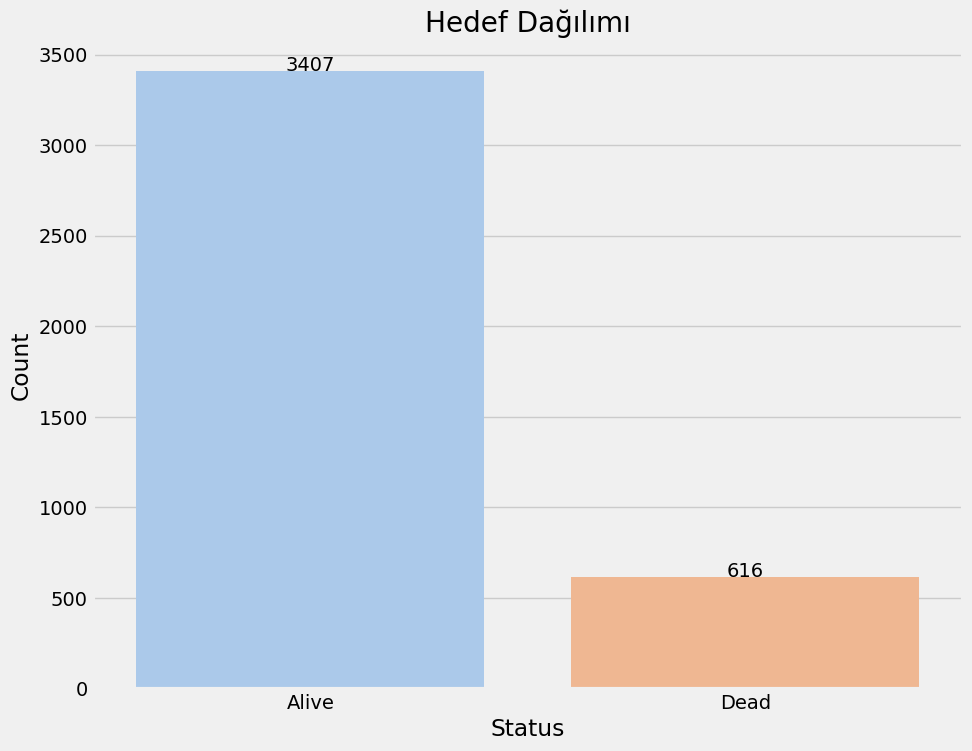

In [14]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(x='Status', data=df, palette='pastel')

# Add labels to each bar in the plot
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")

plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Hedef Dağılımı')
plt.show()

In [15]:
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated'] values
Grade has ['3' '2' '1' ' anaplastic; Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


Medeni Durum sütunu, 'Bekar' değerinin sonunda fazladan bir boşluk var, tutarlılık için bu boşluk kaldırılmalıdır.

Grade sütunu, sınıflandırmalar çok net değil ve yeniden adlandırılmaları gerekiyor.

Farklılık sütununda değerler biraz uzun olduğundan görselleştirme için elverişsiz.

In [16]:
#Fazladan boşlukları kaldırarak 'Medeni Durum' sütununu temizleme
df['Marital Status'] = df['Marital Status'].str.strip() 

#Grade sütunun yeniden adlandırma 
df['Grade'] = df['Grade'].replace({
    '3': 'Grade III', 
    '2': 'Grade II', 
    '1': 'Grade I', 
    ' anaplastic; Grade IV': 'Grade IV'
})

# Daha iyi görselleştirme için 'differentiate' sütun değerlerini yeniden adlandırma
df['differentiate'] = df['differentiate'].replace({
    'Poorly differentiated': 'Poor',
    'Moderately differentiated': 'Moderate',
    'Well differentiated': 'Well',
    'Undifferentiated': 'Undiff'
})


In [17]:
#
for col in cat_cols:
    print(f'{col} has {df[col].unique()} values')

Race has ['White' 'Black' 'Other'] values
Marital Status has ['Married' 'Divorced' 'Single' 'Widowed' 'Separated'] values
T Stage  has ['T1' 'T2' 'T3' 'T4'] values
N Stage has ['N1' 'N2' 'N3'] values
6th Stage has ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB'] values
differentiate has ['Poor' 'Moderate' 'Well' 'Undiff'] values
Grade has ['Grade III' 'Grade II' 'Grade I' 'Grade IV'] values
A Stage has ['Regional' 'Distant'] values
Estrogen Status has ['Positive' 'Negative'] values
Progesterone Status has ['Positive' 'Negative'] values
Status has ['Alive' 'Dead'] values


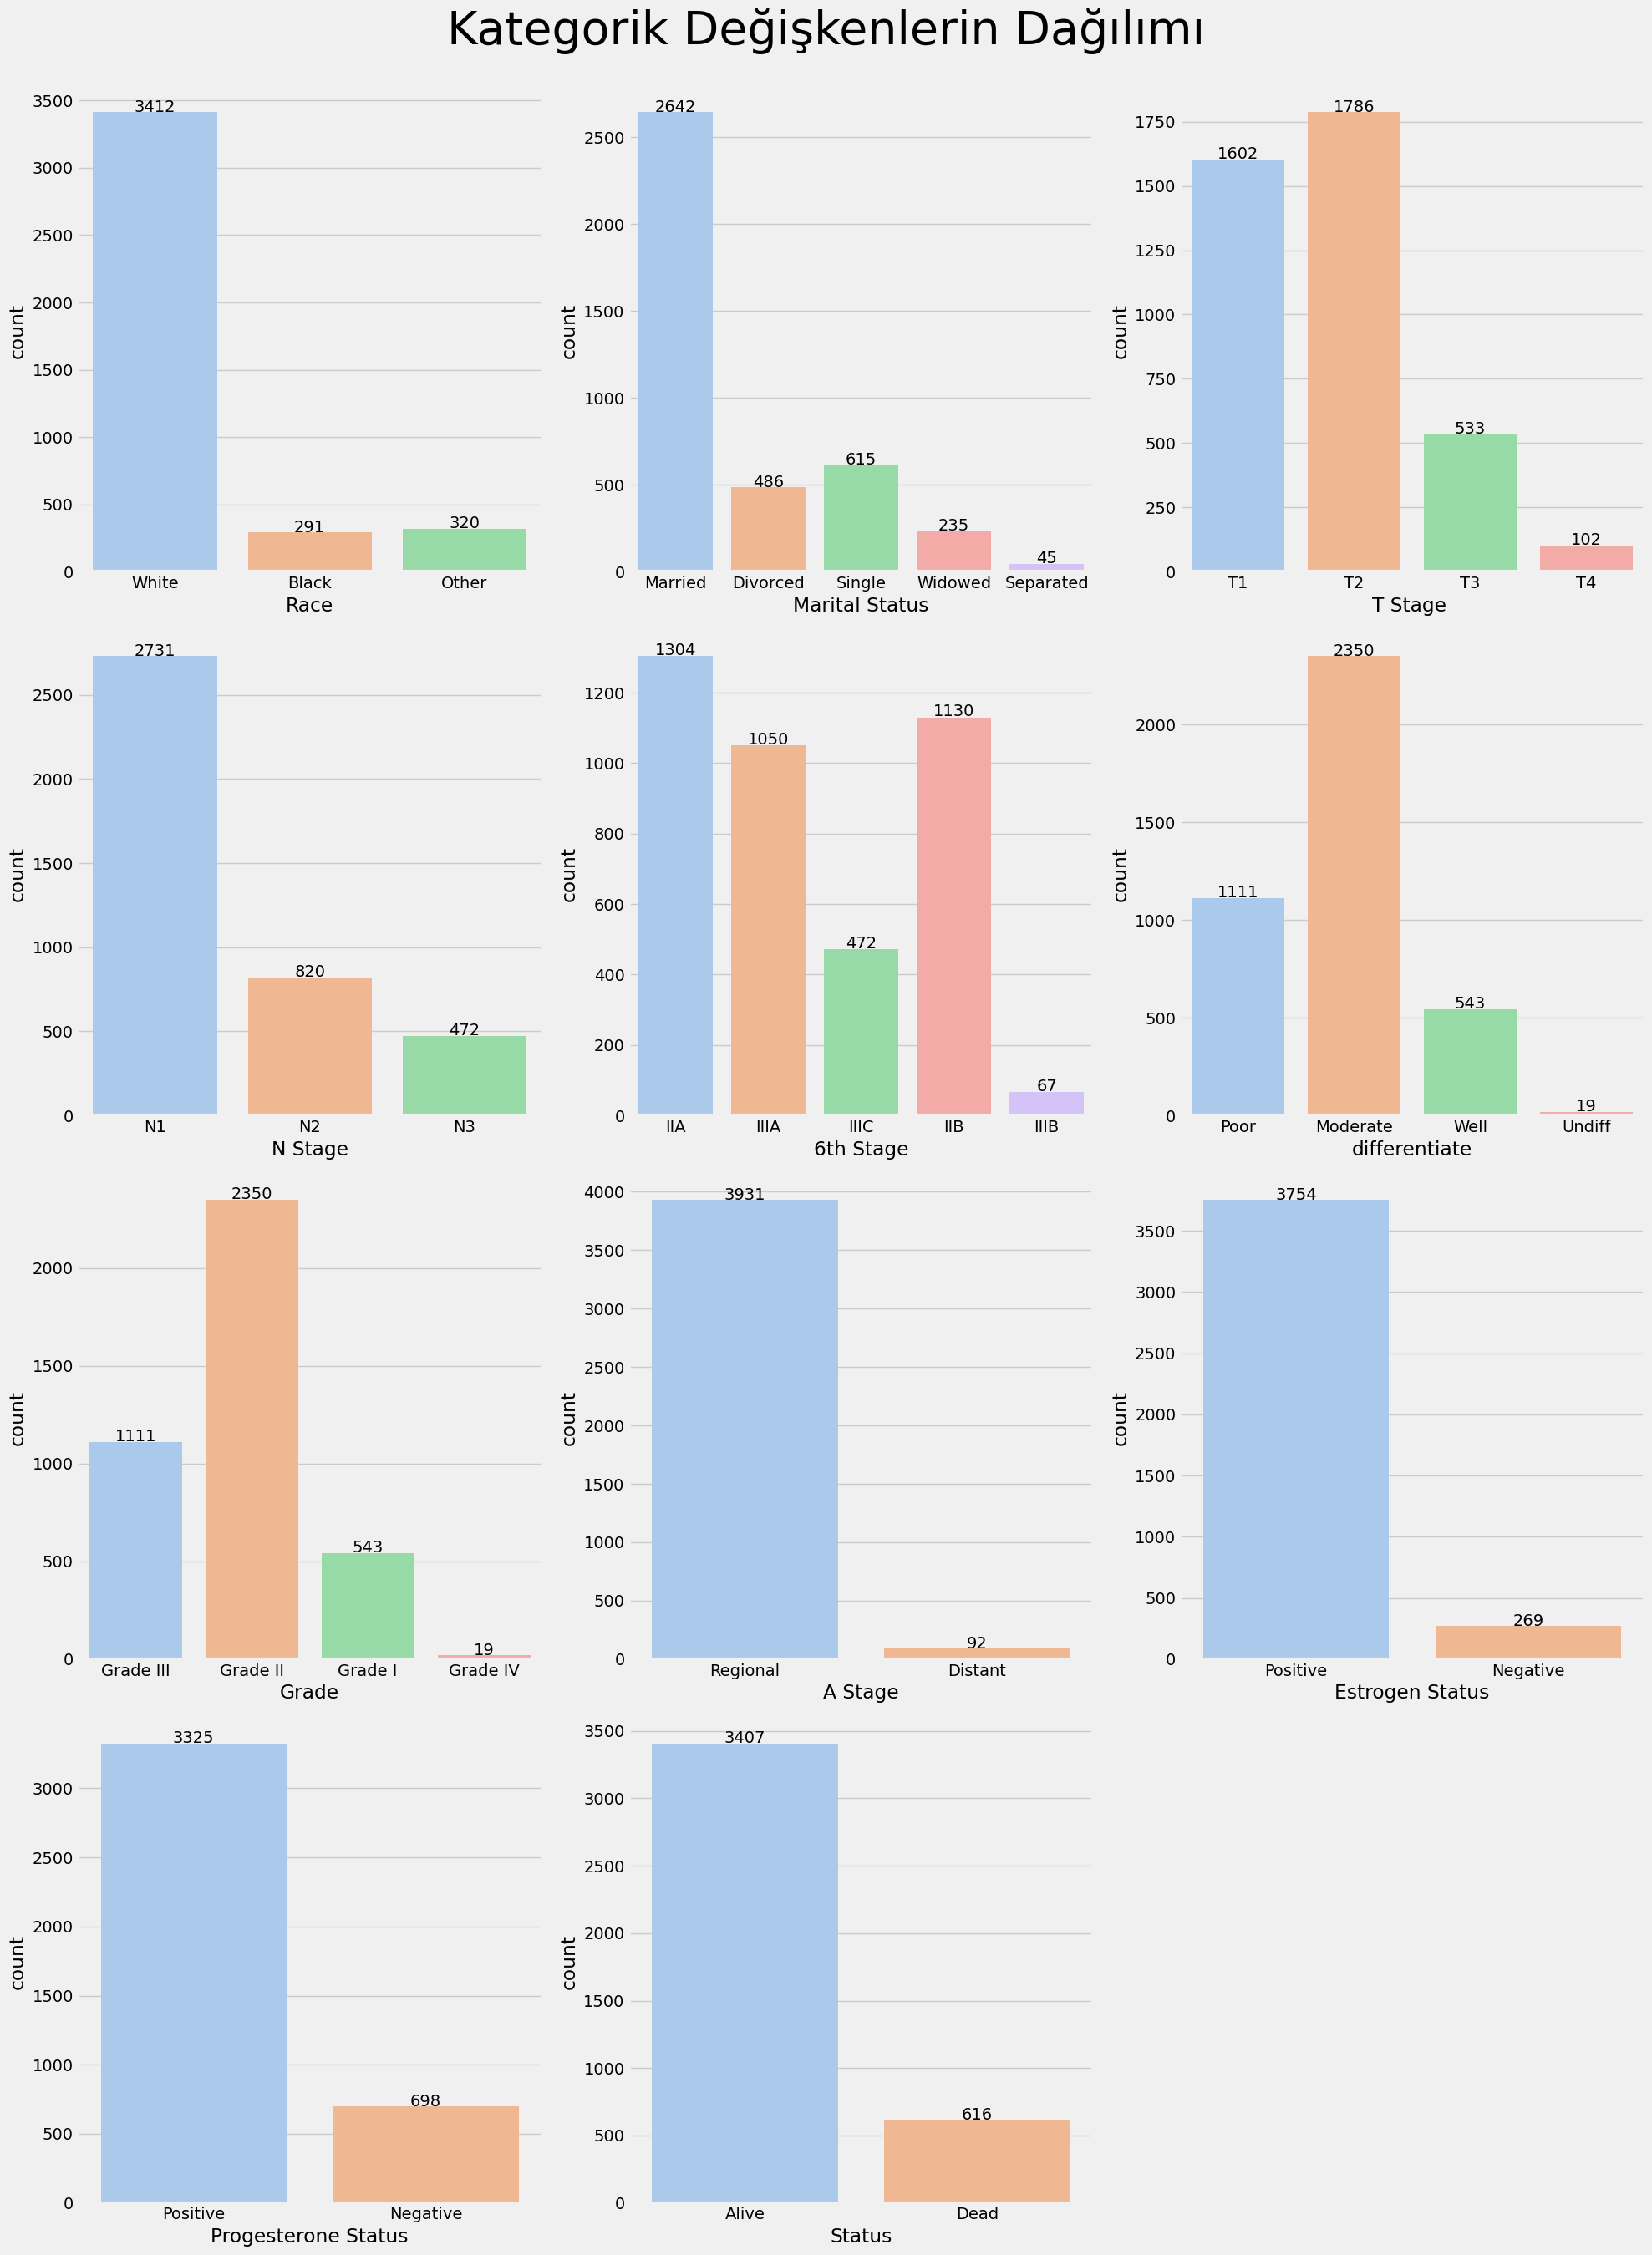

In [19]:
plt.figure(figsize=(20, 27))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(4, 3, plotnumber)
        sns.countplot(x=df[column], palette='pastel')
        
        for p in ax.patches:
            ax.text(p.get_x()+p.get_width()/2, p.get_height()+3, f'{int(p.get_height())}', ha="center")
        
        plt.xlabel(column)
        # plt.xticks(rotation=45)
        plt.xlabel(column)
        
    plotnumber += 1

plt.suptitle('Kategorik Değişkenlerin Dağılımı', fontsize=40, y=1)
plt.tight_layout()
plt.show()

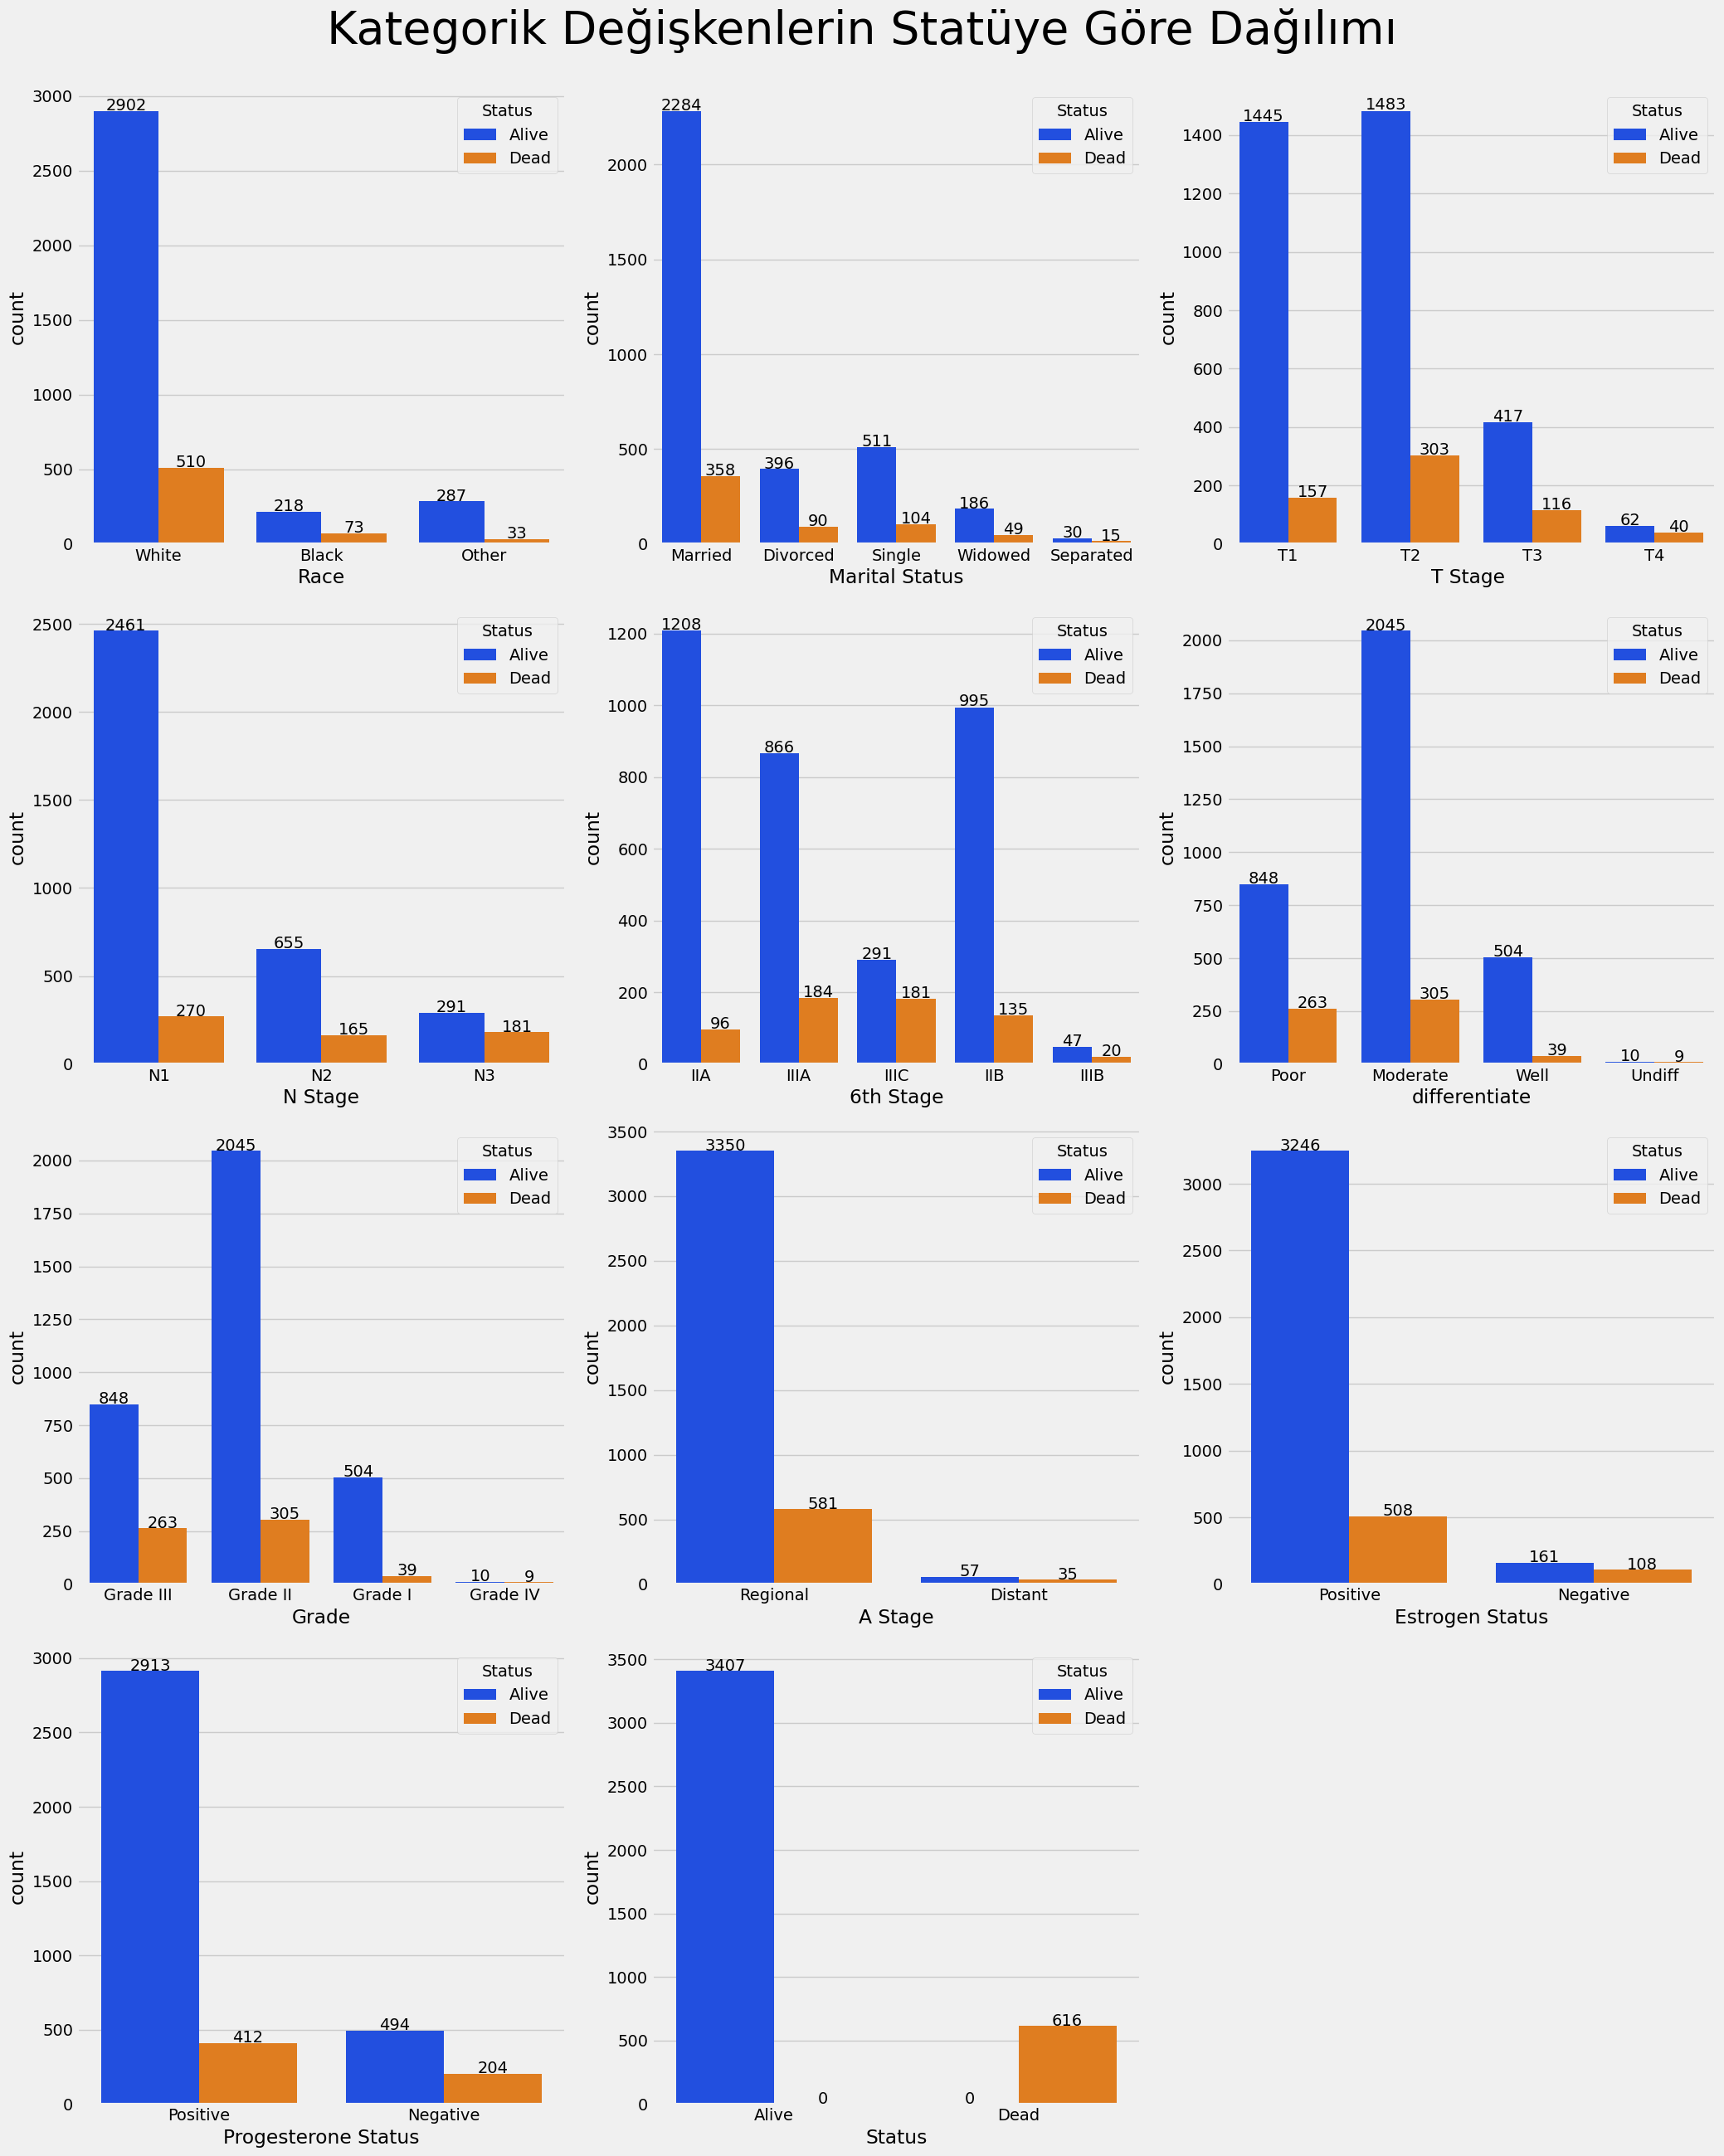

In [24]:
plt.figure(figsize=(21, 26))
plotnumber = 1

for col in cat_cols:
    if plotnumber <= len(cat_cols):
        plt.subplot(4, 3, plotnumber)
        ax = sns.countplot(x=df[col], hue=df['Status'], palette='bright')
        
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 3, f'{int(p.get_height())}', ha="center")
            
    plotnumber += 1

plt.suptitle('Kategorik Değişkenlerin Statüye Göre Dağılımı', fontsize=40, y=1)
plt.tight_layout()
plt.show()

In [25]:
for col in num_cols:
    print(f'{col} has {df[col].unique()} values')

Age has [68 50 58 47 51 40 69 46 65 48 62 61 56 43 60 57 55 63 66 53 59 54 49 64
 42 37 67 31 52 33 45 38 39 36 41 44 32 34 35 30] values
Tumor Size has [  4  35  63  18  41  20   8  30 103  32  13  59  15  19  46  24  25  29
  40  70  22  50  17  21  10  27  23   5  51   9  55 120  77   2  11  12
  26  75 130  34  80   3  60  14  16  45  36  76  38  49   7  72 100  43
  62  37  68  52  85  57  39  28  48 110  65   6 105 140  42  31  90 108
  98  47  54  61  74  33   1  87  81  58 117  44 123 133  95 107  92  69
  56  82  66  78  97  88  53  83 101  84 115  73 125 104  94  86  64  96
  79  67] values
Regional Node Examined has [24 14  2  3 18 11  9 20 21 13 23 16  1 22 15  4 26 31 25 10  5  6 19 12
  8 17  7 49 33 30 34 28 32 27 42 29 41 39 46 40 51 44 38 47 54 36 61 37
 35 43 52 45 57 60] values
Reginol Node Positive has [ 1  5  7  2 18 12  3 14 22 17 23  4 10  6  9  8 20 16 13 11 24 27 21 26
 15 28 19 29 31 46 33 37 30 35 25 32 41 34] values
Survival Months has [ 60  62  75  84  50  

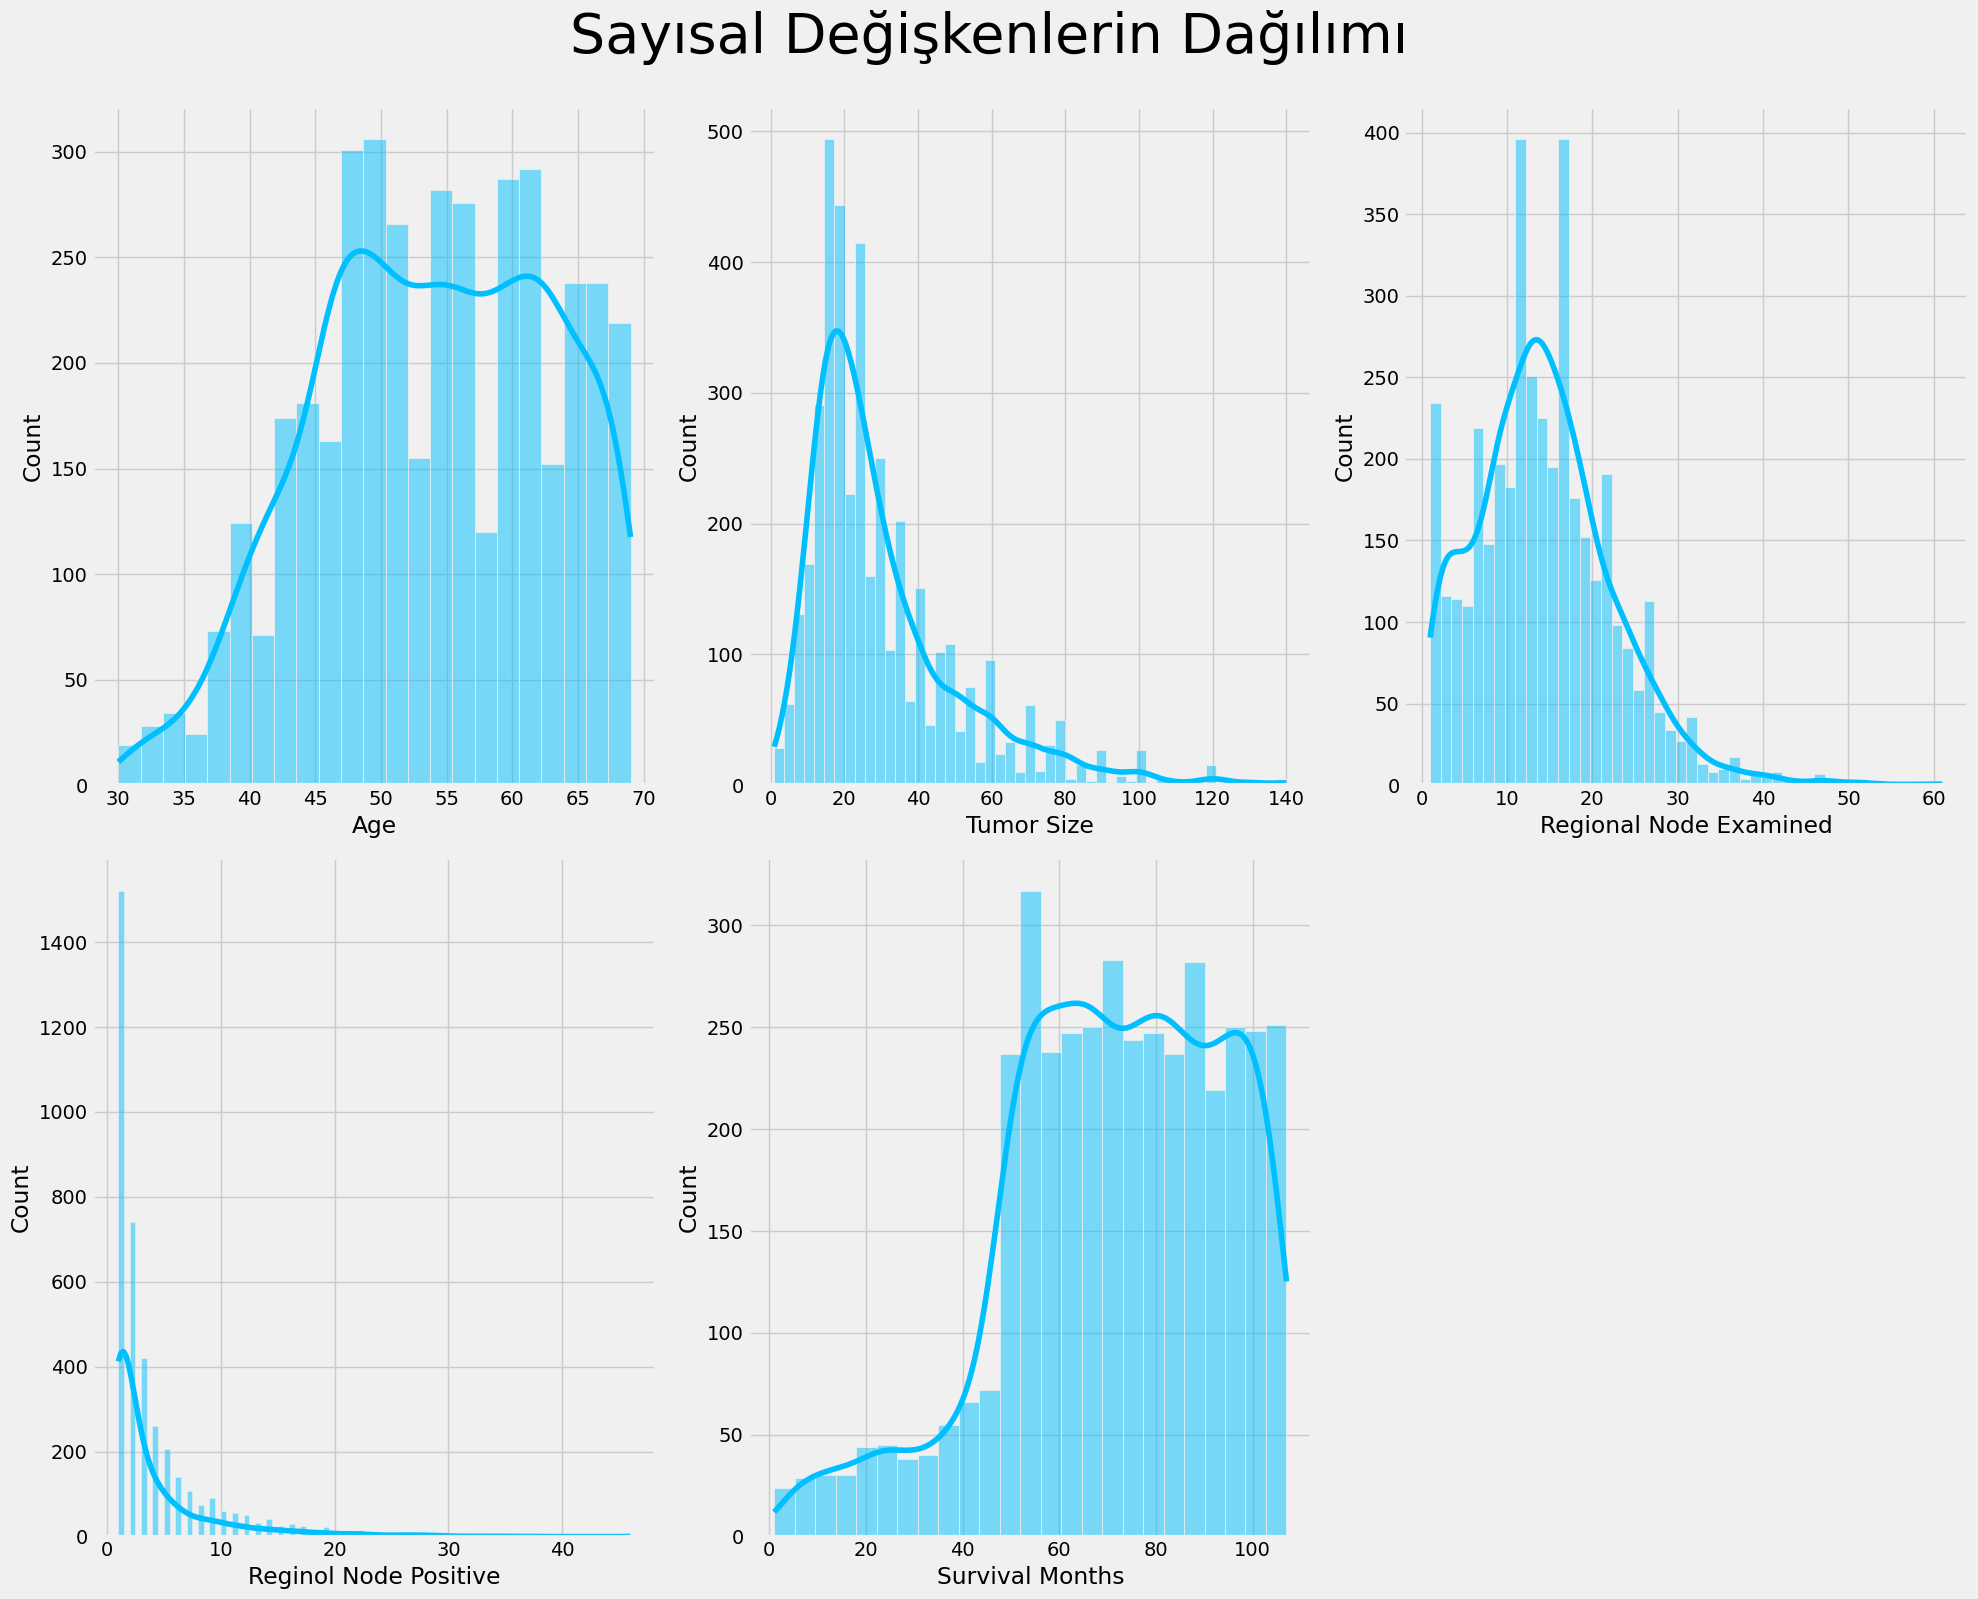

In [28]:
plt.figure(figsize=(20, 16))
plotnumber = 1

for column in num_cols:
    if plotnumber <= len(num_cols):
        ax = plt.subplot(2, 3, plotnumber)
        sns.histplot(df[column], kde=True, color='deepskyblue')
        plt.xlabel(column)
        
    plotnumber += 1

plt.suptitle('Sayısal Değişkenlerin Dağılımı', fontsize=40, y=1)
plt.tight_layout()
plt.show()

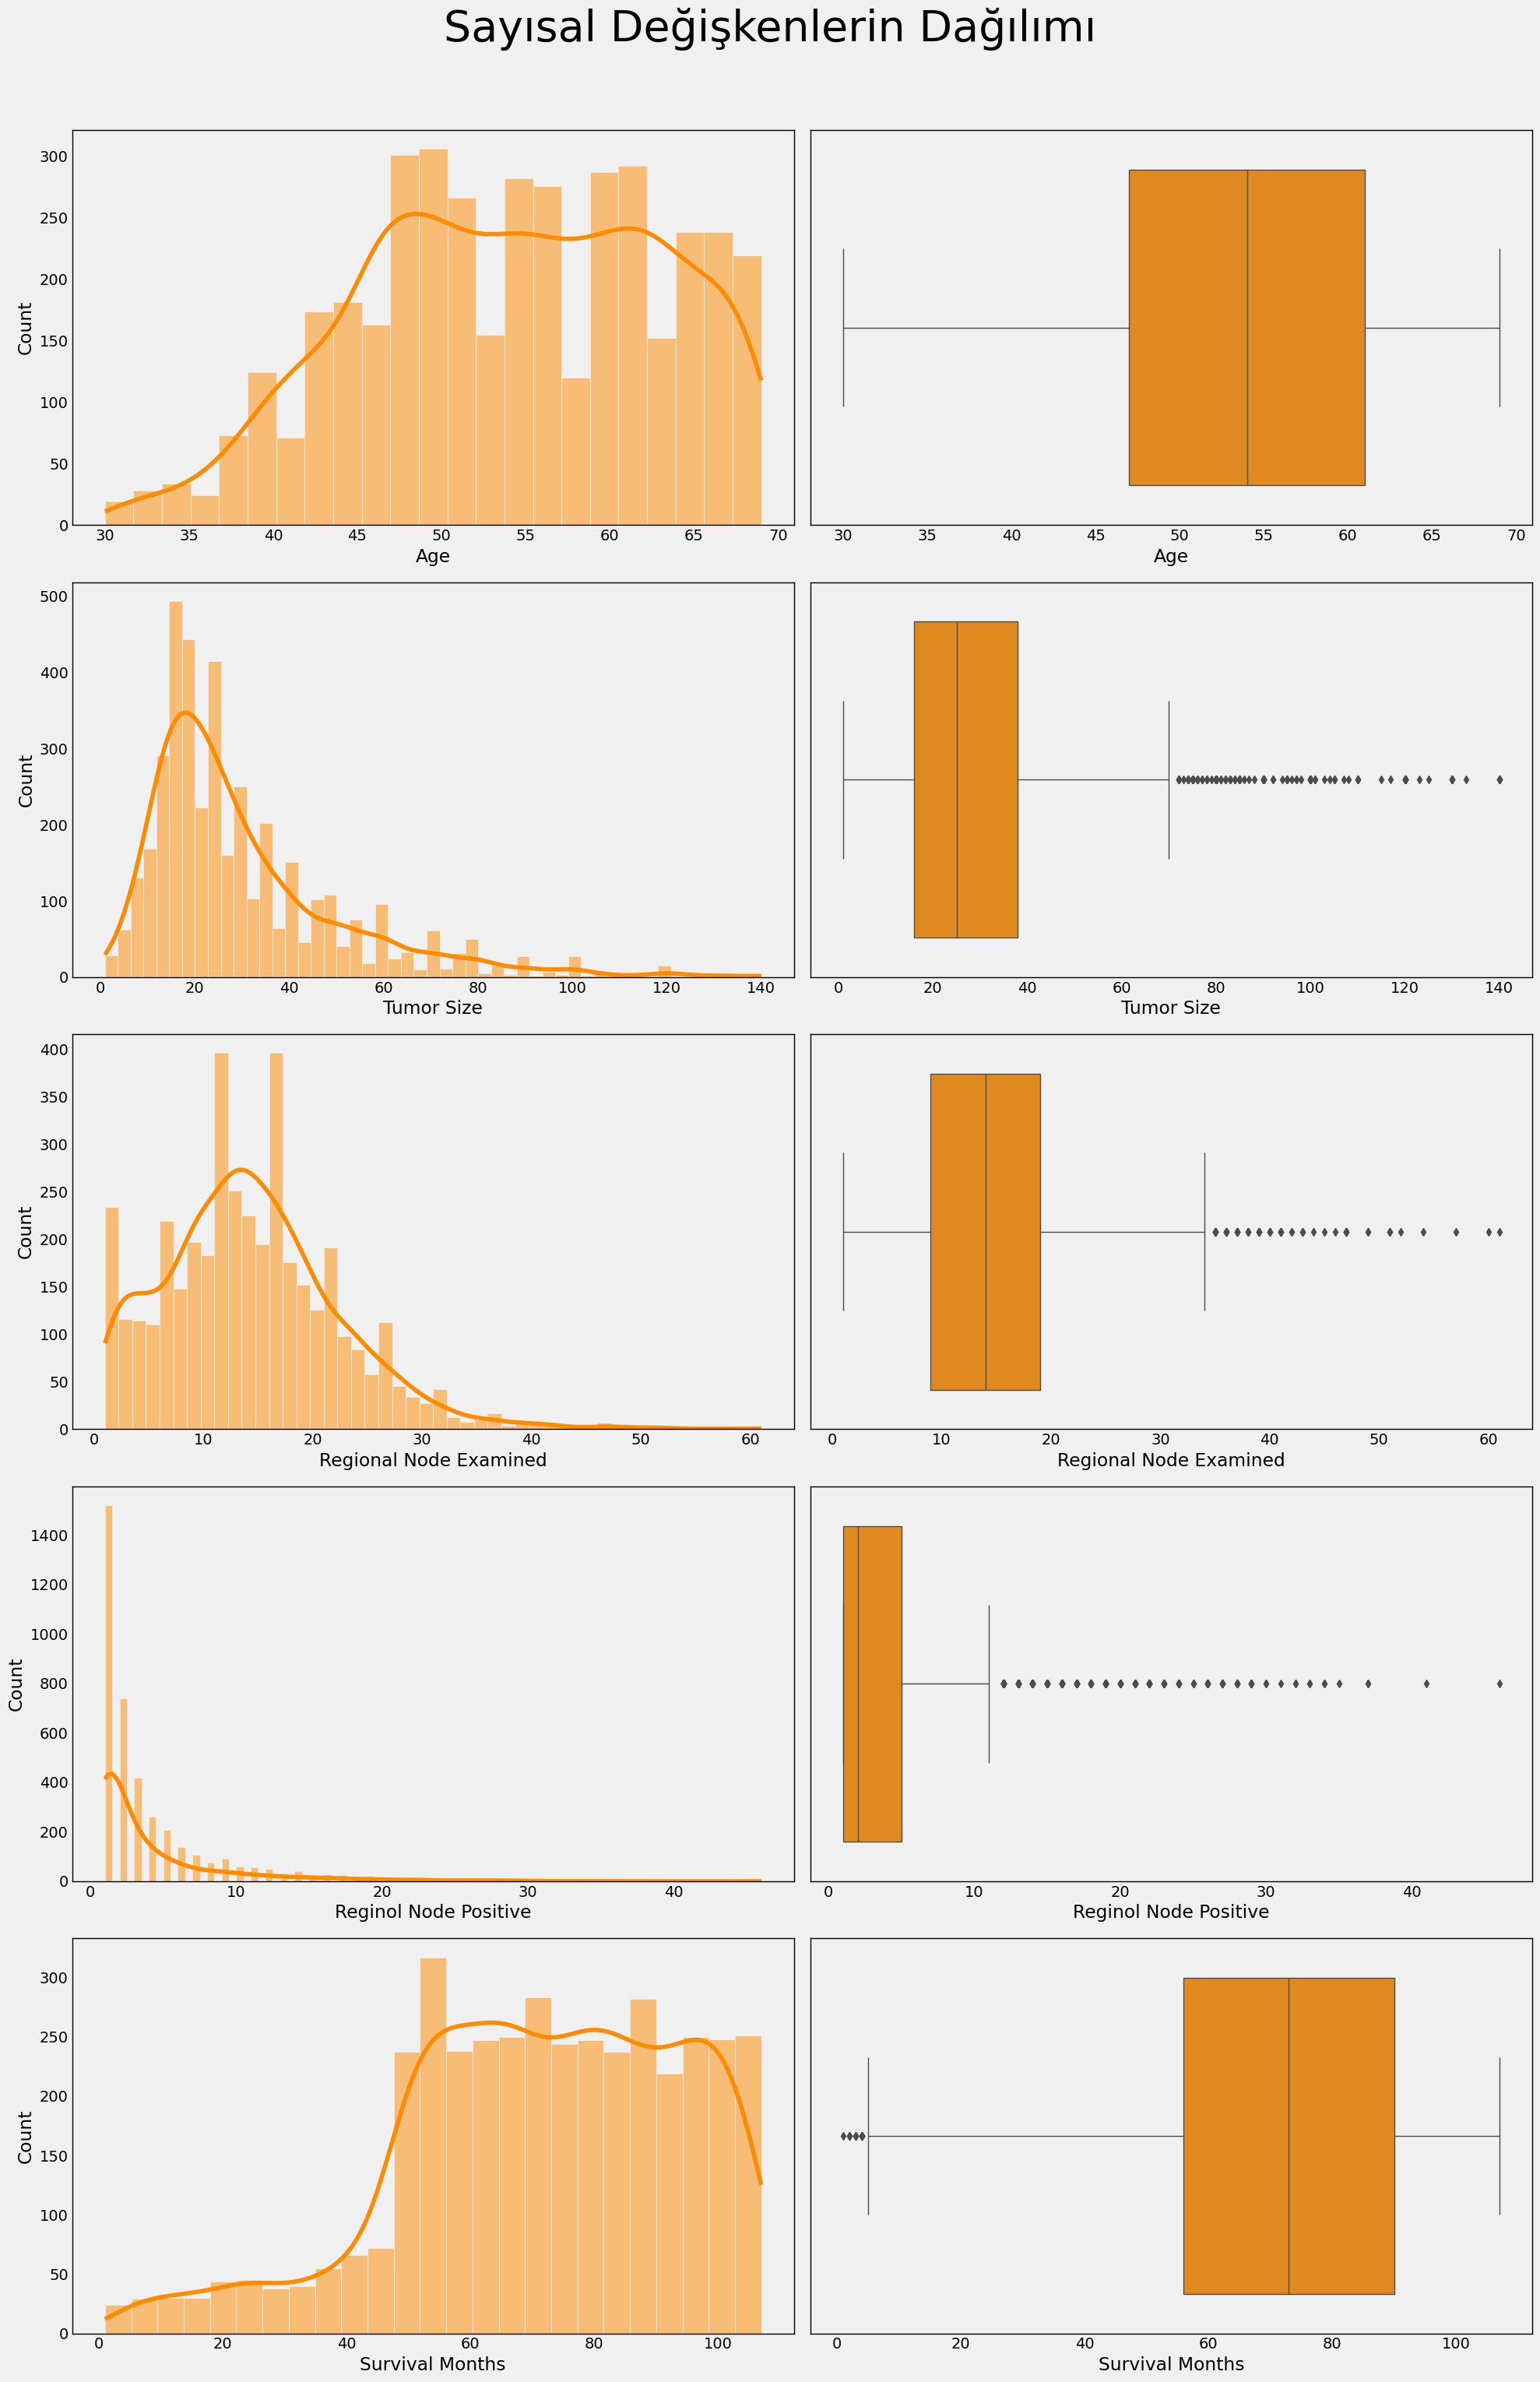

In [29]:


plt.figure(figsize=(20, 30))
plotnumber = 1

# Create boxplots
for col in num_cols:
    # Histogram
    ax = plt.subplot(len(num_cols), 2, plotnumber)
    sns.histplot(df[col], kde=True, color='darkorange')
    plt.xlabel(col)
    plt.grid(False)
    
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    plotnumber += 1
    
    # Boxplot
    ax = plt.subplot(len(num_cols), 2, plotnumber)
    sns.boxplot(x=df[col], color='darkorange', width=0.8, linewidth=1)
    plt.xlabel(col)
    plt.grid(False)
    
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)
    
    plotnumber += 1

    plt.suptitle('Sayısal Değişkenlerin Dağılımı', fontsize=40, y=1.02)
plt.tight_layout()
plt.show()



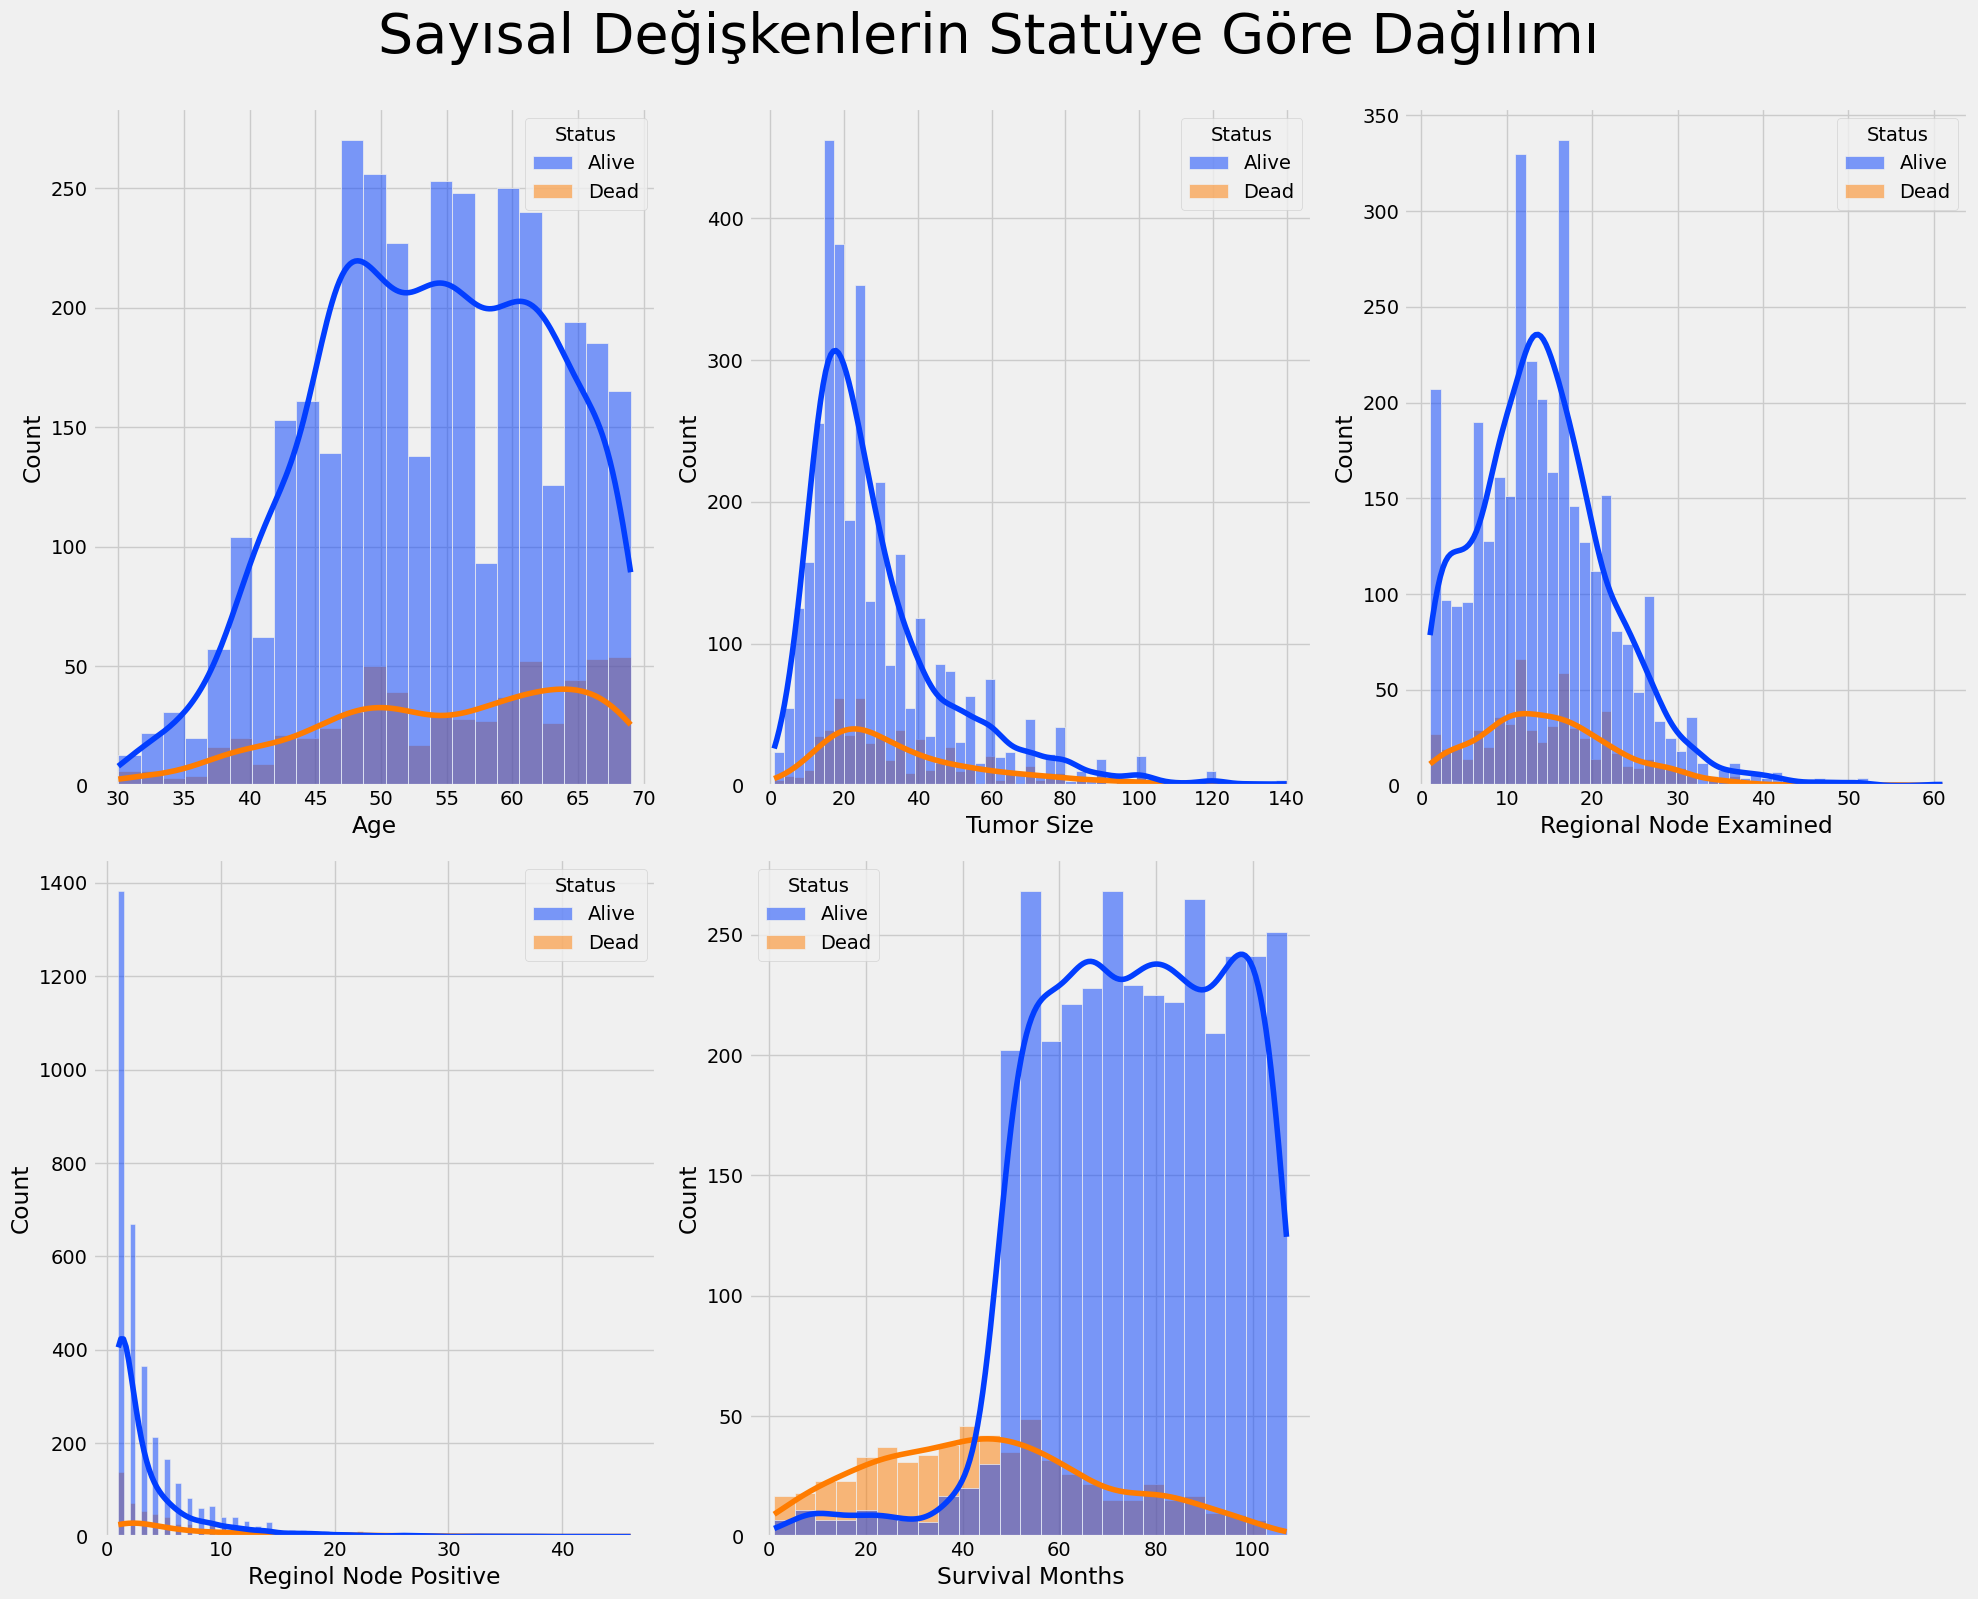

In [30]:
plt.figure(figsize=(20, 16))
plotnumber = 1


for col in num_cols:
    plt.subplot(2, 3, plotnumber)
    sns.histplot(data=df, x=col, hue='Status', kde=True, palette='bright')  
    plt.xlabel(col)
    plotnumber += 1


plt.suptitle('Sayısal Değişkenlerin Statüye Göre Dağılımı', fontsize=40, y=1)
plt.tight_layout()
plt.show()

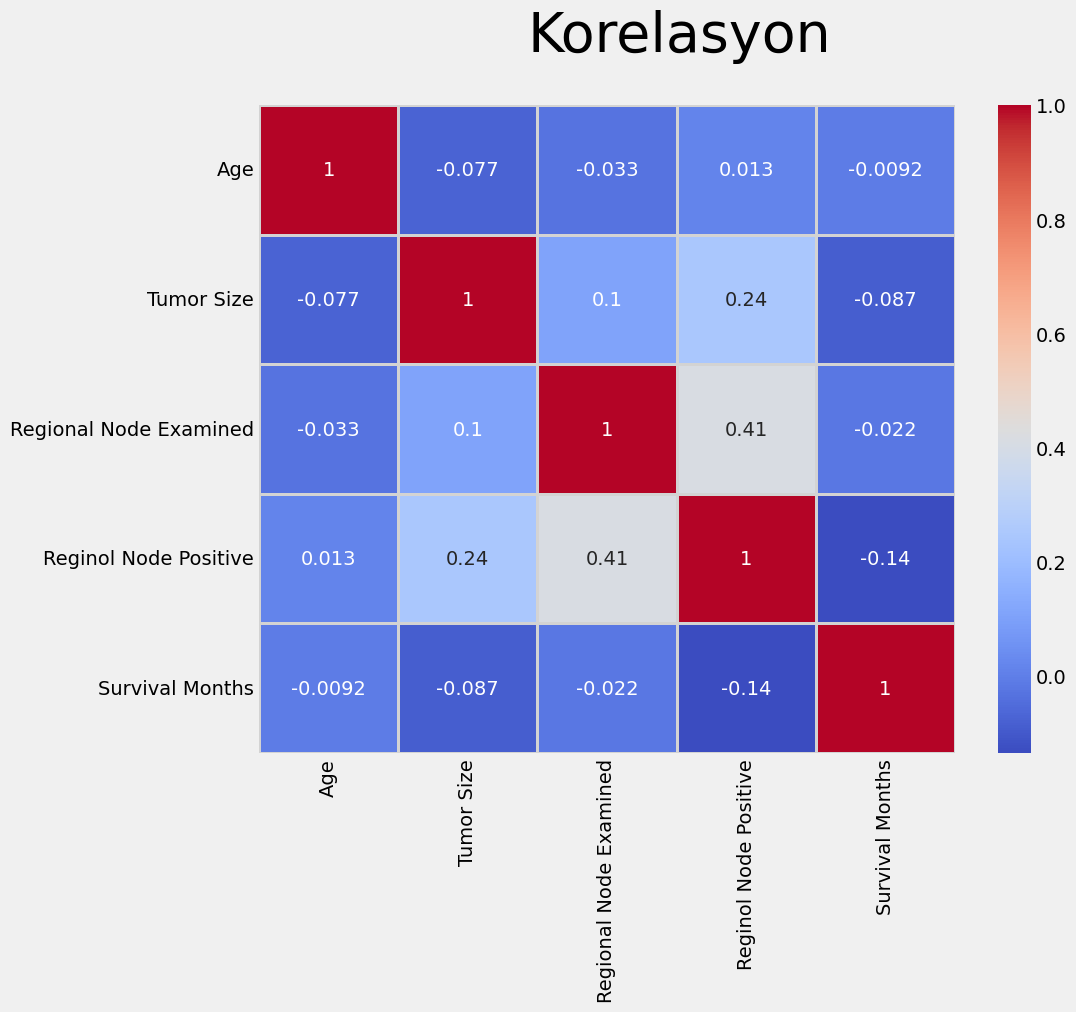

In [31]:
plt.figure(figsize=(10, 8))

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', linewidths=2, linecolor='lightgrey')
plt.suptitle('Korelasyon', fontsize=40, y=1)
plt.show()

In [32]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories")

Race has 3 categories
Marital Status has 5 categories
T Stage  has 4 categories
N Stage has 3 categories
6th Stage has 5 categories
differentiate has 4 categories
Grade has 4 categories
A Stage has 2 categories
Estrogen Status has 2 categories
Progesterone Status has 2 categories
Status has 2 categories


In [33]:
#Kategori etiketlerini kullanarak kategorileri sayısal değerlere dönüştürme
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

**MODELLEME**

In [34]:
df['sum'] = df[df.columns].sum(axis=1)   
df['std'] = df[df.columns].std(axis=1)   
df['mean'] = df[df.columns].mean(axis=1) 
df['max'] = df[df.columns].max(axis=1)   
df['min'] = df[df.columns].min(axis=1)   
df['mode'] = df[df.columns].mode(axis=1)[0]  
df['median'] = df[df.columns].median(axis=1) 
df['q_25th'] = df[df.columns].quantile(0.25, axis=1) #Her bir satırdaki sütunların %25'lik çeyreklik değerini hesaplar ve sonucu yeni bir 'q_25th' sütunu olarak ekler
df['q_75th'] = df[df.columns].quantile(0.75, axis=1) #Her bir satırdaki sütunların %75'lik çeyreklik değerini hesaplar ve sonucu yeni bir 'q_75th' sütunu olarak ekler.
df['skew'] = df[df.columns].skew(axis=1) # Her bir satırdaki sütunların çarpıklık (skewness) değerini hesapla
df['kurt'] = df[df.columns].kurt(axis=1) #Her bir satırdaki sütunların basıklık (kurtosis) değerini hesaplar
df['range'] = df[df.columns].max(axis=1) - df[df.columns].min(axis=1)  #  Her bir satırdaki sütunların değer aralığını (maksimum - minimum) hesaplar 

In [35]:
ind_col = [col for col in df.columns if col!='Status']
dep_col = 'Status'

X = df[ind_col]
y = df[dep_col]

dataframe = df[ind_col]

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(classifier, model_name, X_train, y_train, X_test, y_test):
    
   
    classifier.fit(X_train, y_train)
    
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='macro')
    recall = recall_score(y_test, y_test_pred, average='macro')
    f1 = f1_score(y_test, y_test_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    class_report = classification_report(y_test, y_test_pred)
    
    print(f"Training Accuracy of {model_name}: {train_accuracy:.5f}\n")
    print(f"Confusion Matrix:\n{conf_matrix}\n")
    print(f"Test Accuracy of {model_name}: {accuracy:.5f}")
    print(f"Test Precision of {model_name}: {precision:.5f}")
    print(f"Test Recall of {model_name}: {recall:.5f}")
    print(f"Test F1 Score of {model_name}: {f1:.5f}\n")
    print(f"Classification Report:\n{class_report}")
    
    return {
        "Model Name": model_name,
        "Training Accuracy": train_accuracy,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

**KNN**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_name = "K-Nearest Neighbors"
knn_results = evaluate_model(knn, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of K-Nearest Neighbors: 0.91796

Confusion Matrix:
[[658  20]
 [ 69  58]]

Test Accuracy of K-Nearest Neighbors: 0.88944
Test Precision of K-Nearest Neighbors: 0.82434
Test Recall of K-Nearest Neighbors: 0.71360
Test F1 Score of K-Nearest Neighbors: 0.75125

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       678
           1       0.74      0.46      0.57       127

    accuracy                           0.89       805
   macro avg       0.82      0.71      0.75       805
weighted avg       0.88      0.89      0.88       805



**Gaussian Naive Bayes(GNB)**

In [42]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model_name = "Gaussian Naive Bayes"
gnb_results = evaluate_model(gnb, model_name, X_train, y_train, X_test, y_test)



Training Accuracy of Gaussian Naive Bayes: 0.87073

Confusion Matrix:
[[662  16]
 [ 85  42]]

Test Accuracy of Gaussian Naive Bayes: 0.87453
Test Precision of Gaussian Naive Bayes: 0.80517
Test Recall of Gaussian Naive Bayes: 0.65355
Test F1 Score of Gaussian Naive Bayes: 0.69159

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       678
           1       0.72      0.33      0.45       127

    accuracy                           0.87       805
   macro avg       0.81      0.65      0.69       805
weighted avg       0.86      0.87      0.85       805



**LOGİSTİC REGRESYON**

In [43]:


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
model_name = "Logistic Regression"
logreg_results = evaluate_model(logreg, model_name, X_train, y_train, X_test, y_test)



Training Accuracy of Logistic Regression: 0.91330

Confusion Matrix:
[[669   9]
 [ 53  74]]

Test Accuracy of Logistic Regression: 0.92298
Test Precision of Logistic Regression: 0.90908
Test Recall of Logistic Regression: 0.78470
Test F1 Score of Logistic Regression: 0.83024

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       678
           1       0.89      0.58      0.70       127

    accuracy                           0.92       805
   macro avg       0.91      0.78      0.83       805
weighted avg       0.92      0.92      0.92       805



**Support Vector Machine (SVM)**

In [44]:
from sklearn.svm import SVC

svm = SVC()
model_name = 'Support Vector Machine'
svm_results = evaluate_model(svm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Support Vector Machine: 0.91889

Confusion Matrix:
[[668  10]
 [ 63  64]]

Test Accuracy of Support Vector Machine: 0.90932
Test Precision of Support Vector Machine: 0.88934
Test Recall of Support Vector Machine: 0.74459
Test F1 Score of Support Vector Machine: 0.79250

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       678
           1       0.86      0.50      0.64       127

    accuracy                           0.91       805
   macro avg       0.89      0.74      0.79       805
weighted avg       0.91      0.91      0.90       805



**Decision Tree(KARAR AĞACI)**

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
model_name = 'Decision Tree'
dtc_results = evaluate_model(dtc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Decision Tree: 1.00000

Confusion Matrix:
[[619  59]
 [ 54  73]]

Test Accuracy of Decision Tree: 0.85963
Test Precision of Decision Tree: 0.73640
Test Recall of Decision Tree: 0.74389
Test F1 Score of Decision Tree: 0.74003

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       678
           1       0.55      0.57      0.56       127

    accuracy                           0.86       805
   macro avg       0.74      0.74      0.74       805
weighted avg       0.86      0.86      0.86       805



**Random Forest**

In [47]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model_name = 'Random Forest'
rfc_results = evaluate_model(rfc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Random Forest: 1.00000

Confusion Matrix:
[[662  16]
 [ 54  73]]

Test Accuracy of Random Forest: 0.91304
Test Precision of Random Forest: 0.87240
Test Recall of Random Forest: 0.77560
Test F1 Score of Random Forest: 0.81286

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       678
           1       0.82      0.57      0.68       127

    accuracy                           0.91       805
   macro avg       0.87      0.78      0.81       805
weighted avg       0.91      0.91      0.91       805



**#Extra Trees**

In [49]:
#ensemble learning yöntemlerinden biri olan Random Forest'ın bir türevidir. 
#Bu yöntem, daha fazla rastgelelik katarak ve bazı süreçleri farklılaştırarak çalışır. 
#Bu nedenle, bazen Random Forest'a göre daha iyi performans gösterebilir

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
model_name = 'Extra Trees'
etc_results = evaluate_model(etc, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Extra Trees: 1.00000

Confusion Matrix:
[[663  15]
 [ 57  70]]

Test Accuracy of Extra Trees: 0.91056
Test Precision of Extra Trees: 0.87218
Test Recall of Extra Trees: 0.76453
Test F1 Score of Extra Trees: 0.80444

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       678
           1       0.82      0.55      0.66       127

    accuracy                           0.91       805
   macro avg       0.87      0.76      0.80       805
weighted avg       0.91      0.91      0.90       805



**AdaBoost**

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
model_name = 'AdaBoost'
ada_results = evaluate_model(ada, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of AdaBoost: 0.91889

Confusion Matrix:
[[664  14]
 [ 42  85]]

Test Accuracy of AdaBoost: 0.93043
Test Precision of AdaBoost: 0.89955
Test Recall of AdaBoost: 0.82432
Test F1 Score of AdaBoost: 0.85587

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       678
           1       0.86      0.67      0.75       127

    accuracy                           0.93       805
   macro avg       0.90      0.82      0.86       805
weighted avg       0.93      0.93      0.93       805



**Histogram-based Gradient Boosting**

In [ ]:
#Histogram-based Gradient Boosting, klasik Gradient Boosting yönteminin optimizasyonunu ve hızını artırmak amacıyla geliştirilmiş bir algoritmadır.
#Temel amacı, çok büyük veri setleri ve yüksek boyutlu özellik uzaylarında daha verimli çalışmaktır. 

In [52]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()
model_name = 'Hist Gradient Boosting'
hgb_results = evaluate_model(hgb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Hist Gradient Boosting: 0.99410

Confusion Matrix:
[[660  18]
 [ 49  78]]

Test Accuracy of Hist Gradient Boosting: 0.91677
Test Precision of Hist Gradient Boosting: 0.87169
Test Recall of Hist Gradient Boosting: 0.79381
Test F1 Score of Hist Gradient Boosting: 0.82562

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       678
           1       0.81      0.61      0.70       127

    accuracy                           0.92       805
   macro avg       0.87      0.79      0.83       805
weighted avg       0.91      0.92      0.91       805



**Gradient Boosting Machine (GBM)**

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
model_name = 'Gradient Boosting Machine'
gbm_results = evaluate_model(gbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Gradient Boosting Machine: 0.93692

Confusion Matrix:
[[666  12]
 [ 50  77]]

Test Accuracy of Gradient Boosting Machine: 0.92298
Test Precision of Gradient Boosting Machine: 0.89767
Test Recall of Gradient Boosting Machine: 0.79430
Test F1 Score of Gradient Boosting Machine: 0.83424

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       678
           1       0.87      0.61      0.71       127

    accuracy                           0.92       805
   macro avg       0.90      0.79      0.83       805
weighted avg       0.92      0.92      0.92       805



**Stochastic Gradient Boosting Machine (SGBM)**

In [ ]:
#Stochastic Gradient Boosting Machine (SGBM), klasik Gradient Boosting algoritmasının bir varyantıdır 
#temel amacı, modelin genelleme performansını artırırken aynı zamanda eğitim süresini hızlandırmaktır

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

sgbm = GradientBoostingClassifier(subsample=0.7)  
model_name = 'Stochastic Gradient Boosting Machine'
sgbm_results = evaluate_model(sgbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Stochastic Gradient Boosting Machine: 0.94251

Confusion Matrix:
[[667  11]
 [ 48  79]]

Test Accuracy of Stochastic Gradient Boosting Machine: 0.92671
Test Precision of Stochastic Gradient Boosting Machine: 0.90532
Test Recall of Stochastic Gradient Boosting Machine: 0.80291
Test F1 Score of Stochastic Gradient Boosting Machine: 0.84288

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       678
           1       0.88      0.62      0.73       127

    accuracy                           0.93       805
   macro avg       0.91      0.80      0.84       805
weighted avg       0.92      0.93      0.92       805



**eXtreme Gradient Boosting (XGBoost)**

In [55]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model_name = 'XGBoost'
xgb_results = evaluate_model(xgb, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of XGBoost: 1.00000

Confusion Matrix:
[[655  23]
 [ 44  83]]

Test Accuracy of XGBoost: 0.91677
Test Precision of XGBoost: 0.86004
Test Recall of XGBoost: 0.80981
Test F1 Score of XGBoost: 0.83189

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       678
           1       0.78      0.65      0.71       127

    accuracy                           0.92       805
   macro avg       0.86      0.81      0.83       805
weighted avg       0.91      0.92      0.91       805



**Categorical Boosting (CatBoost)**

In [56]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(verbose=0)
model_name = 'CatBoost'
cat_results = evaluate_model(cat, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of CatBoost: 0.96830

Confusion Matrix:
[[666  12]
 [ 50  77]]

Test Accuracy of CatBoost: 0.92298
Test Precision of CatBoost: 0.89767
Test Recall of CatBoost: 0.79430
Test F1 Score of CatBoost: 0.83424

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       678
           1       0.87      0.61      0.71       127

    accuracy                           0.92       805
   macro avg       0.90      0.79      0.83       805
weighted avg       0.92      0.92      0.92       805



**Light Gradient Boosting Machine (LightGBM)**

In [57]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(verbose=-1)
model_name = 'LightGBM'
lgbm_results = evaluate_model(lgbm, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of LightGBM: 0.99565

Confusion Matrix:
[[661  17]
 [ 49  78]]

Test Accuracy of LightGBM: 0.91801
Test Precision of LightGBM: 0.87602
Test Recall of LightGBM: 0.79455
Test F1 Score of LightGBM: 0.82758

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       678
           1       0.82      0.61      0.70       127

    accuracy                           0.92       805
   macro avg       0.88      0.79      0.83       805
weighted avg       0.91      0.92      0.91       805



**Multilayer Perceptron (MLP)**

In [ ]:
#Multilayer Perceptron (MLP), yapay sinir ağlarının (artificial neural networks, ANN) bir türüdür 
#derin öğrenme alanında en yaygın kullanılan ağ mimarilerinden biridir. 
#MLP, doğrusal olmayan bir sınıflandırma ve regresyon modelidir ve çok katmanlı bir yapıya sahiptir

In [58]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
model_name = 'Multilayer Perceptron'
mlp_results = evaluate_model(mlp, model_name, X_train, y_train, X_test, y_test)

Training Accuracy of Multilayer Perceptron: 0.95245

Confusion Matrix:
[[656  22]
 [ 53  74]]

Test Accuracy of Multilayer Perceptron: 0.90683
Test Precision of Multilayer Perceptron: 0.84804
Test Recall of Multilayer Perceptron: 0.77511
Test F1 Score of Multilayer Perceptron: 0.80480

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       678
           1       0.77      0.58      0.66       127

    accuracy                           0.91       805
   macro avg       0.85      0.78      0.80       805
weighted avg       0.90      0.91      0.90       805



**Model Karşılaştırması**

**Modelin genel olarak ne kadar doğru tahmin yaptığı**

In [60]:
accuracy = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['Accuracy'], gnb_results['Accuracy'], logreg_results['Accuracy'], 
              svm_results['Accuracy'], dtc_results['Accuracy'], rfc_results['Accuracy'], 
              etc_results['Accuracy'], ada_results['Accuracy'], hgb_results['Accuracy'], 
              gbm_results['Accuracy'], sgbm_results['Accuracy'], xgb_results['Accuracy'], 
              cat_results['Accuracy'], lgbm_results['Accuracy'], mlp_results['Accuracy']]
})

accuracy_sorted = accuracy.sort_values(by='Score', ascending=False)
accuracy_sorted

,Model,Score
7,AdaBoost,0.930435
10,SGBM,0.926708
2,Logistic Regression,0.922981
9,GBM,0.922981
12,CatBoost,0.922981
13,LightGBM,0.918012
8,Hist Gradient Boosting,0.916770
11,XGBoost,0.916770
5,Random Forest,0.913043
6,Extra Trees,0.910559


In [61]:
fig = px.bar(data_frame=accuracy_sorted, x='Score', y='Model', color='Score',
             title='Accuracy Comparison', text='Score', 
             width=900, height=750)
fig.show()

**Modelin pozitif tahminlerinin doğruluğunu**

In [62]:
precision = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['Precision'], gnb_results['Precision'], logreg_results['Precision'], 
              svm_results['Precision'], dtc_results['Precision'], rfc_results['Precision'], 
              etc_results['Precision'], ada_results['Precision'], hgb_results['Precision'], 
              gbm_results['Precision'], sgbm_results['Precision'], xgb_results['Precision'], 
              cat_results['Precision'], lgbm_results['Precision'], mlp_results['Precision']]
})

precision_sorted = precision.sort_values(by='Score', ascending=False)
precision_sorted

,Model,Score
2,Logistic Regression,0.909080
10,SGBM,0.905322
7,AdaBoost,0.899548
9,GBM,0.897668
12,CatBoost,0.897668
3,SVM,0.889341
13,LightGBM,0.876019
5,Random Forest,0.872403
6,Extra Trees,0.872181
8,Hist Gradient Boosting,0.871694


In [63]:
fig = px.bar(data_frame = precision_sorted, x='Score', y='Model', color='Score', 
             title='Precision Comparison', text='Score', 
             width=900, height=750)
fig.show()

**Modelin gerçek pozitif örnekleri ne kadar iyi yakaladığını**

In [64]:
recall = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['Recall'], gnb_results['Recall'], logreg_results['Recall'], 
              svm_results['Recall'], dtc_results['Recall'], rfc_results['Recall'], 
              etc_results['Recall'], ada_results['Recall'], hgb_results['Recall'], 
              gbm_results['Recall'], sgbm_results['Recall'], xgb_results['Recall'], 
              cat_results['Recall'], lgbm_results['Recall'], mlp_results['Recall']]
})

recall_sorted = recall.sort_values(by='Score', ascending=False)
recall_sorted

,Model,Score
7,AdaBoost,0.824321
11,XGBoost,0.809810
10,SGBM,0.802912
13,LightGBM,0.794550
9,GBM,0.794300
12,CatBoost,0.794300
8,Hist Gradient Boosting,0.793812
2,Logistic Regression,0.784701
5,Random Forest,0.775602
14,MLP,0.775114


In [65]:
fig = px.bar(data_frame = recall_sorted, x='Score', y='Model', color='Score', 
             title='Recall Comparison', text='Score', 
             width=900, height=750)
fig.show()

**Precision ve recall’ün dengeli bir ölçüsünü sunar**

In [66]:
f1_score = pd.DataFrame({
    'Model': ['KNN', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM', 
              'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 
              'Hist Gradient Boosting', 'GBM', 'SGBM', 'XGBoost', 
              'CatBoost', 'LightGBM', 'MLP'],
    'Score': [knn_results['F1 Score'], gnb_results['F1 Score'], logreg_results['F1 Score'], 
              svm_results['F1 Score'], dtc_results['F1 Score'], rfc_results['F1 Score'], 
              etc_results['F1 Score'], ada_results['F1 Score'], hgb_results['F1 Score'], 
              gbm_results['F1 Score'], sgbm_results['F1 Score'], xgb_results['F1 Score'], 
              cat_results['F1 Score'], lgbm_results['F1 Score'], mlp_results['F1 Score']]
})

f1_score_sorted = f1_score.sort_values(by='Score', ascending=False)
f1_score_sorted

,Model,Score
7,AdaBoost,0.855875
10,SGBM,0.842878
9,GBM,0.834243
12,CatBoost,0.834243
11,XGBoost,0.831895
2,Logistic Regression,0.830238
13,LightGBM,0.827576
8,Hist Gradient Boosting,0.825623
5,Random Forest,0.812855
14,MLP,0.804802
